# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


### (From end of last week's lesson) Boolean Subsetting

In [2]:
import pandas as pd
student_dict = {
    'name': ['Samantha', 'Alex', 'Dante', 'Samantha'],
    'age': ['35', '17', '26', '21'],
    'city': ['Houston', 'Seattle', 'New york', 'Atlanta'],
    'state': ['Texas', 'Washington', 'New York', 'Georgia']
}

students_df = pd.DataFrame(student_dict)

In [5]:
[students_df['name'] == 'Samantha']

[0     True
 1    False
 2    False
 3     True
 Name: name, dtype: bool]

In [3]:
# The statement data[‘name’] == ‘Samantha’] produces a Pandas Series with a True/False value for every row
# in the ‘data’ DataFrame, where there are “True” values for the rows where the name is “Samantha”.
# These type of boolean arrays can be passed directly to the .loc indexer.
students_df.loc[students_df['name'] == 'Samantha']

,name,age,city,state
0,Samantha,35,Houston,Texas
3,Samantha,21,Atlanta,Georgia


In [6]:
# What about if we only want the city and state of the selected students with the name Samantha?
students_df.loc[students_df['name'] == 'Samantha', ['city', 'state']]

,city,state
0,Houston,Texas
3,Atlanta,Georgia


In [8]:
# What amount if we want to select a student of a specific age?
students_df.loc[students_df['age'] == '21']

,name,age,city,state
3,Samantha,21,Atlanta,Georgia


In [9]:
# What amount if we want to select a student of a specific age?
students_df.loc[(students_df['age'] == '21') &
                (students_df['city'] == 'Atlanta')]

,name,age,city,state
3,Samantha,21,Atlanta,Georgia


In [11]:
# What should be returned?
students_df.loc[(students_df['age'] == '35') &
                (students_df['city'] == 'Atlanta')]

,name,age,city,state


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [12]:
!pwd
!ls -lath

/Users/flatironschool/Documents/fis/dc-ds-08-26-19/module-1/week-2/day-1-pandas-2
total 104
drwxr-xr-x  8 flatironschool  staff   256B Sep  3 09:48 .
-rw-r--r--  1 flatironschool  staff    27K Sep  3 09:48 pandas-2-manipulation.ipynb
drwxr-xr-x  3 flatironschool  staff    96B Sep  3 09:42 .ipynb_checkpoints
-rw-r--r--  1 flatironschool  staff   3.2K Sep  3 09:37 pre_process_animal_shelter_data.py
-rw-r--r--  1 flatironschool  staff    17K Sep  3 09:37 manipulating_data_with_pandas.ipynb
drwxr-xr-x  4 flatironschool  staff   128B Sep  3 09:37 images
drwxr-xr-x  5 flatironschool  staff   160B Sep  3 09:37 data
drwxr-xr-x  3 flatironschool  staff    96B Sep  3 09:37 ..


In [13]:
import pandas as pd
import numpy as np

uci = pd.read_csv('data/heart.csv')

In [15]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [16]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
uci.shape

(303, 14)

In [19]:
uci.size

4242

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [20]:
# Call the .info() method on our dataset. What do you observe?
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [21]:
uci_new = uci.copy()
uci_new['str_col'] = 'B'

In [22]:
uci_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,str_col
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,B
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,B
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,B
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,B
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,B


In [23]:
# Call the .describe() method on our dataset. What do you observe?
uci_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# Use the code below. How does the output differ from info() ?
uci_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
str_col      object
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

Also check out `.count()` and  `.isna()`.

In [25]:
uci_new.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [26]:
uci_new.max()

age          77
sex           1
cp            3
trestbps    200
chol        564
fbs           1
restecg       2
thalach     202
exang         1
oldpeak     6.2
slope         2
ca            4
thal          3
target        1
str_col       B
dtype: object

In [27]:
pd.isna(uci.ca).all()

False

#### The Axis Variable

In [28]:
uci.sum(axis=1)  # Try [shift] + [tab] here!

0      600.3
1      614.5
2      554.4
3      598.8
4      701.6
5      542.4
6      649.3
7      609.0
8      596.5
9      559.6
10     601.2
11     600.2
12     624.6
13     539.8
14     663.0
15     555.6
16     698.0
17     565.6
18     619.5
19     611.8
20     596.5
21     596.4
22     593.0
23     602.0
24     570.4
25     704.4
26     589.6
27     468.6
28     788.8
29     540.2
       ...  
273    556.1
274    557.0
275    567.0
276    536.0
277    591.3
278    673.0
279    499.6
280    624.8
281    546.0
282    547.2
283    603.0
284    555.9
285    627.8
286    570.8
287    614.0
288    656.0
289    528.0
290    581.0
291    641.4
292    607.8
293    588.8
294    483.8
295    547.0
296    525.0
297    496.0
298    567.2
299    561.2
300    558.4
301    442.2
302    602.0
Length: 303, dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [29]:
uci.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Exercise: What are the different values for `restecg`?

In [30]:
# Your code here!
uci.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

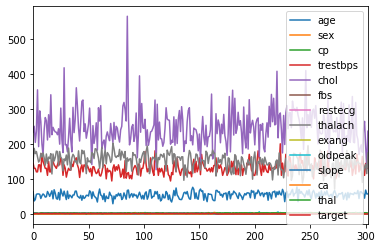

In [31]:
%matplotlib inline
uci.plot()

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [33]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [34]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107099 entries, 0 to 107098
Data columns (total 12 columns):
Animal ID           107099 non-null object
Name                73433 non-null object
DateTime            107099 non-null object
MonthYear           107099 non-null object
Date of Birth       107099 non-null object
Outcome Type        107092 non-null object
Outcome Subtype     48798 non-null object
Animal Type         107099 non-null object
Sex upon Outcome    107095 non-null object
Age upon Outcome    107080 non-null object
Breed               107099 non-null object
Color               107099 non-null object
dtypes: object(12)
memory usage: 9.8+ MB


In [35]:
animal_outcomes.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [36]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A791820,Bandit,09/03/2019 08:00:00 AM,09/03/2019 08:00:00 AM,04/01/2011,Euthanasia,At Vet,Dog,NaN,NaN,Pit Bull/Labrador Retriever,Brown Brindle/White
1,A794029,Isla,09/03/2019 06:57:00 AM,09/03/2019 06:57:00 AM,05/03/2018,Adoption,Foster,Dog,Spayed Female,1 year,Australian Kelpie Mix,Black/White
2,A803458,Loki,09/02/2019 09:55:00 PM,09/02/2019 09:55:00 PM,04/01/2019,Euthanasia,Suffering,Dog,Intact Male,5 months,Pit Bull Mix,Tan
3,A803490,Zeus,09/02/2019 06:34:00 PM,09/02/2019 06:34:00 PM,09/02/2015,Return to Owner,NaN,Dog,Neutered Male,4 years,Treeing Tennesse Brindle,Brown Brindle
4,A803551,Penelope,09/02/2019 06:31:00 PM,09/02/2019 06:31:00 PM,09/02/2013,Return to Owner,NaN,Dog,Spayed Female,6 years,Dachshund/Australian Cattle Dog,White/Brown


What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [37]:
# What are the breed value_counts?
animal_outcomes.Breed.value_counts()

Domestic Shorthair Mix                       30156
Pit Bull Mix                                  8026
Labrador Retriever Mix                        6264
Chihuahua Shorthair Mix                       6013
Domestic Medium Hair Mix                      3025
German Shepherd Mix                           2716
Domestic Shorthair                            2551
Bat Mix                                       1741
Domestic Longhair Mix                         1492
Australian Cattle Dog Mix                     1366
Siamese Mix                                   1218
Bat                                           1027
Dachshund Mix                                  977
Boxer Mix                                      893
Border Collie Mix                              867
Miniature Poodle Mix                           802
Catahoula Mix                                  620
Siberian Husky Mix                             619
Australian Shepherd Mix                        611
Staffordshire Mix              

In [42]:
# What's the top breed for adopted dogs?
animal_outcomes['Animal Type'].value_counts()

Dog          60797
Cat          40196
Other         5606
Bird           484
Livestock       16
Name: Animal Type, dtype: int64

In [47]:
animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') & (animal_outcomes['Outcome Type'] == 'Adoption')].Breed.value_counts()

Labrador Retriever Mix                          3181
Pit Bull Mix                                    3119
Chihuahua Shorthair Mix                         2879
German Shepherd Mix                             1372
Australian Cattle Dog Mix                        768
Dachshund Mix                                    479
Border Collie Mix                                467
Boxer Mix                                        417
Catahoula Mix                                    337
Staffordshire Mix                                329
Miniature Poodle Mix                             318
Australian Shepherd Mix                          298
Siberian Husky Mix                               275
Jack Russell Terrier Mix                         273
Cairn Terrier Mix                                272
Pointer Mix                                      270
Rat Terrier Mix                                  265
Chihuahua Longhair Mix                           246
Anatol Shepherd Mix                           

In [ ]:
# How about outcome counts for dogs?
animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') & (animal_outcomes['Outcome Type'] == 'Adoption')].Breed.value_counts()

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [ ]:
def successor(x):
    return x + 1

In [ ]:
uci.applymap(successor).head()

The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [ ]:
uci['age'].map(successor).tail(10)

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [ ]:
uci['oldpeak'].map(lambda x: round(x))[:4]

Exercise: Use an anonymous function to turn the entries in age to strings

In [ ]:
# Your code here


### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [ ]:
# Your code here


## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [ ]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [ ]:
uci.groupby('sex').groups

In [ ]:
uci.groupby('sex').get_group(0)  # .tail()

### Aggregating

In [ ]:
uci.groupby('sex').std()

Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [ ]:
# Your code here


#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [ ]:
# Your code here


## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [ ]:
uci.pivot(values='sex', columns='target').head()

### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [ ]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns=['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns=['age', 'HP'])

In [ ]:
toy1.join(toy2.set_index('age'),
          on='age',
          lsuffix='_A',
          rsuffix='_B').head()

### `.merge()`

In [ ]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)

In [ ]:
states = pd.read_csv('data/states.csv', index_col=0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states], sort=False)

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here